In [1]:
from mdcrow import MDCrow
import os

In [2]:
#todays date and time
import datetime

start = datetime.datetime.now()
date = start.strftime("%Y-%m-%d")
print("date:",date)
time = start.strftime("%H:%M:%S")
print("time:",time)

date: 2024-09-08
time: 18:40:30


In [3]:
model = "accounts/fireworks/models/llama-v3p1-70b-instruct"

agent = MDCrow(
    agent_type='Structured', 
    model=model, 
    tools_model=model,
    top_k_tools="all"
)

print("LLM: ", agent.llm.model_name,"\nTemperature: ", agent.llm.temperature)

LLM:  accounts/fireworks/models/llama-v3p1-70b-instruct 
Temperature:  0.1


In [4]:
prompt10 = "Simulate protein 1ZNI at 300 K for 1 ns and calculate the RMSD."
answer = agent.run(prompt10)

Thought:

 To simulate protein 1ZNI at

 300 K for 1 ns and

 calculate the RMSD, I need

 to first set up and run a simulation

 of the protein. Then, I can

 use the trajectory file from the

 simulation to calculate the RMSD.

Action

:
```
{
  "action":

 "SetUpandRunFunction",


  "action_input": {
    "pdb

_id": "1ZNI",
    "force

field_files": ["amber99

sbildn.xml

", "

tip3

p.xml"],
    "save":

 true,
   

 "system_params": {
      "non

bondedMethod": "PME",
      "non

bondedCutoff": "1

.0 * nanometers",
      "ew

aldErrorTolerance

": 0.00001,


      "constraints": "HBonds",


      "rigidWater": true,


      "constraintTolerance": 0.

00001,
      "s

olvate": true
    },
   

 "integrator_params": {
     

 "integrator_type

": "LangevinMiddle

",
      "Temperature": "300 *

 kelvin",
      "Fr

iction": "1.0 / pic

oseconds",
      "Timestep": "0.

002 * picoseconds",
      "Pressure

": "1.0 * bar"


    },
    "simulation_params": {
     

 "En

semble":

 "NPT",


      "Number of Steps": 500000

,
      "record_interval_steps":

 100,
      "record_params":

 ["step", "potentialEnergy",

 "temperature"]
    }
  }
}
```


Thought:

 I need to download the PDB

 file for 1ZNI and then

 use the file ID to set up

 and run the simulation.

Action:
```
{
 

 "action": "PDBFileDownloader",
 

 "action_input": "1ZNI"


}
```


PDB file found with this ID: 1ZNI


Thought:

 Now that I have the PDB file ID

, I can use it to set up and run

 the simulation.

Action:
```
{
 

 "action": "SetUpandRunFunction

",
  "action_input": {
   

 "pdb_id": "1ZNI_184

036",
    "forcefield_files": ["

amber99sbildn.xml

", "tip3p.xml"],
   

 "save": true,
    "system

_params": {
      "nonbonded

Method": "PME",
      "nonbonded

Cutoff": "1.0 *

 nanometers",
      "ewaldError

Tolerance": 0.00001

,
      "constraints": "HBonds

",
      "rigidWater":

 true,
      "constraintTolerance": 

0.00001,
      "s

olvate": true
    },
   

 "integrator_params": {
      "integr

ator_type": "LangevinMiddle

",
      "Temperature":

 "300 * kelvin

",
      "Friction": "1.

0 / picoseconds",
      "T

imestep": "0.002 * picoseconds

",
      "Pressure": "1.

0 * bar"
    },
    "simulation

_params": {
      "Ensemble": "

NPT",
      "Number

 of Steps": 500000,
      "record_interval_steps": 100,
      "record_params": ["step", "potentialEnergy", "temperature"]
    }
  }
}
```



Building system...


About to create system...
Attempts at creating system: 0/3


Error adding solvent ValueError – No template found for residue 1 (GLY).  The set of atoms is similar to GLY, but it is missing 3 hydrogen atoms.  For more information, see https://github.com/openmm/openmm/wiki/Frequently-Asked-Questions#template
Residue code: GLY
Residue code not in solvent list. Adding forcefield                         not supported.


Thought:

 The simulation failed because the residue 

1 (GLY) is missing 

3 hydrogen atoms. I need

 to clean the PDB file by adding

 missing atoms and hydrogens before

 setting up and running the simulation.



Action:
```
{
  "action": "

CleaningToolFunction",
  "action

_input": {
    "pdb_id":

 "1ZNI_184036",


    "replace_nonstandard_resid

ues": true,
    "add_missing_atoms

": true,
    "remove_heter

ogens": true,
    "remove_water":

 true,
    "add_hydrogens":

 true,
    "add_hydrogens_ph":

 7.0
  }
}
```



file path: /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_134/pdb/1ZNI_raw_20240908_184036.pdb


Thought:

 Now that the PDB file has been cleaned

, I can use the cleaned file

 ID to set up and run the simulation.



Action:
```
{
  "action": "

SetUpandRunFunction",
  "action

_input": {
    "pdb_id":

 "1ZNI_184041",


    "forcefield_files": ["amber99

sbildn.xml", "tip3

p.xml

"],
    "save": true,
   

 "system_params": {
      "non

bondedMethod": "PME",


      "nonbondedCutoff": "

1.0 * nanometers",
     

 "ewaldErrorTolerance":

 0.00001,
      "constraints

": "HBonds",
      "rig

idWater": true,
      "constraint

Tolerance": 0.

00001

,
      "solvate": true


    },
    "integrator_params

": {
      "integrator_type":

 "LangevinMiddle",
      "Temperature

": "300 * kelvin",


      "Friction": "1.

0 /

 pic

oseconds",
      "Timestep": "0

.002 * picoseconds",
      "Pressure

": "1.0 *

 bar"
    },
    "simulation_params":

 {
      "Ensemble

": "NPT",
      "Number

 of Steps": 500000,
      "record

_interval_steps": 100,


      "record_params": ["step", "

potentialEnergy", "temperature"]
    }
 

 }
}
```

Building system...


About to create system...
Attempts at creating system: 0/3


System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x2b500dbfee20> >
Setting up integrator...
Creating simulation...
simulation set!
Performing energy minimization...


Minimization complete!


Initial Positions saved to initial_positions.pdb
Equilibrating...


Simulating...


Done!
Standalone simulation script written to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_134/simulations/NPT_1ZNI_184041_20240908_184045.py
['LOG_sim0_161453_1XQ8_161450_20240908_161540.txt', 'batch5.sh', 'TOP_sim0_161453_1XQ8_161450_20240908_161540.pdb', 'exp_10.ipynb', 'LOG_sim0_120215_1C3W_120212_20240909_120219.txt', 'TOP_sim0_120215_1C3W_120212_20240909_120219.pdb', 'exp_13.ipynb', 'exp_22.ipynb', 'TRAJ_sim0_155242_1MBN_155238_20240908_155243.dcd', 'TRAJ_sim0_181258_1MBN_181255_20240908_181317.dcd', 'TRAJ_sim0_094939_1_094932_20240909_094940.dcd', 'exp_8.ipynb', 'TOP_sim0_184045_1ZNI_184041_20240908_184050.pdb', 'TRAJ_sim0_094431_1_094428_20240909_094434.dcd', 'out.batch2b', 'LOG_sim0_113712_1ZNI_113708_20240909_113716.txt', 'LOG_sim0_155242_1MBN_155238_20240908_155243.txt', 'TOP_sim0_094951_1_094932_20240909_094951.pdb', 'TOP_sim0_094911_1_094428_20240909_094911.pdb', 'exp_3.ipynb', 'exp_19_updated.ipynb', 'TOP_sim0_113712_1ZNI_113708_20240909_113716.pdb', 'LOG_sim0_1654

Thought:

 Now that the simulation is complete,

 I can use

 the trajectory file to calculate the RMSD.



Action:
``

`
{
  "action": "ComputeR

MSD",
  "action_input":

 {
    "top_id": "top

_sim0_184045",
    "tr

aj_id": "rec0_

184050",
    "select": "

protein",
    "mol_name":

 "1ZNI_184041"


  }
}
```

Calculating RMSD...


Data saved to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_134/records/rmsd_1ZNI_184041.csv


Plot saved to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_134/figures/FIG_rmsd_1ZNI_184041_20240909_140705.png


Final Answer

: The RMSD

 of the protein 1ZNI

 at 300 K for 

1 ns is calculated and saved to csv

 with file ID rmsd_1

ZNI_184041. The plot of

 the RMSD is saved with plot

 ID fig0_140

705.

In [5]:
end = datetime.datetime.now()
elapsed = end - start
print(f"duration: {elapsed.total_seconds()/60:.2f} minutes")

duration: 1166.63 minutes


In [6]:
registry = agent.path_registry
print("ckpt_dir",os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

ckpt_dir ckpt_134
Files found in registry: 1ZNI_184036: PDB file downloaded from RSCB
 PDBFile ID: 1ZNI_184036
 1ZNI_184041: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_184045: Initial positions for simulation sim0_184045
 sim0_184045: Basic Simulation of Protein 1ZNI_184041
 rec0_184050: Simulation trajectory for protein 1ZNI_184041 and simulation sim0_184045
 rec1_184050: Simulation state log for protein 1ZNI_184041 and simulation sim0_184045
 rec2_184050: Simulation pdb frames for protein 1ZNI_184041 and simulation sim0_184045
 rmsd_1ZNI_184041: RMSD for 1ZNI_184041
 fig0_140705: RMSD plot for 1ZNI_184041


In [7]:
#ensure all files are in path registry
assert all(n in paths_and_descriptions for n in ['1ZNI', 'rmsd', 'sim0', 'top_sim0', 'fig0']), "Not all file ids are present in path registry"

In [8]:
# let's see if we can't grab the plot
import re
import os
match = re.search(r"fig0_\d+", paths_and_descriptions)
plot_path = registry.get_mapped_path(match.group(0))
assert os.path.exists(plot_path)

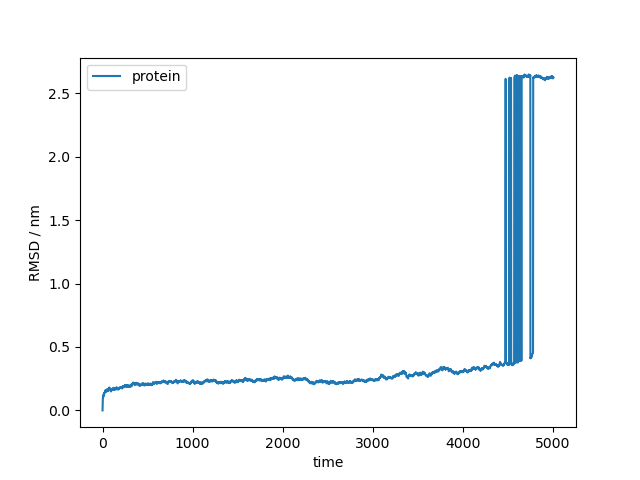

In [9]:
from IPython.display import Image

Image(filename=plot_path)

# Experiment Result: ✅❌

1. Completed without Exception or TimeOut Errors ✅
2. Attempted all necessary steps ✅
3. Completed without Hallucination ✅
4. Logic make sense ✅
5. Correct Answer ✅